# Data analysis


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
df = pd.read_csv("D:\Python Labs\Python Class Project/book_data_cleaned.csv", sep=",", index_col="bookID")

In [3]:
df.head()

,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,month,date,year,Age_of_book
bookID,,,,,,,,,,,,,,,
1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling,4.57,439785960,9.780440e+12,eng,652,2095690,27591,2006-09-16,Scholastic Inc.,9,16,2006,15.0
2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling,4.49,439358078,9.780440e+12,eng,870,2153167,29221,2004-09-01,Scholastic Inc.,9,1,2004,17.0
4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,439554896,9.780440e+12,eng,352,6333,244,2003-11-01,Scholastic,11,1,2003,18.0
5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling,4.56,043965548X,9.780440e+12,eng,435,2339585,36325,2004-05-01,Scholastic Inc.,5,1,2004,18.0
8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling,4.78,439682584,9.780440e+12,eng,2690,41428,164,2004-09-13,Scholastic,9,13,2004,17.0


## a. Initial understanding of the data

Before finding any corelations let's explore the data available.

In [4]:
df.describe()

,average_rating,isbn13,num_pages,ratings_count,text_reviews_count,month,date,year,Age_of_book
count,11125.000000,1.112500e+04,11125.000000,1.112500e+04,11125.000000,11125.000000,11125.000000,11125.000000,11125.000000
mean,3.933613,9.759884e+12,336.315326,1.793868e+04,541.925213,6.546427,11.258427,2000.169169,21.318652
std,0.352473,4.429361e+11,241.104641,1.124894e+05,2576.402036,3.413982,10.279753,8.247779,8.271156
min,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000,1.000000,1.000000,1900.000000,2.000000
25%,3.770000,9.780350e+12,192.000000,1.040000e+02,9.000000,4.000000,1.000000,1998.000000,16.000000
50%,3.960000,9.780590e+12,299.000000,7.450000e+02,46.000000,7.000000,8.000000,2003.000000,19.000000
75%,4.140000,9.780870e+12,416.000000,4.991000e+03,237.000000,9.000000,20.000000,2005.000000,23.000000
max,5.000000,9.790010e+12,6576.000000,4.597666e+06,94265.000000,12.000000,31.000000,2020.000000,122.000000


### Average rating

On an average, books rating is about 3.9. Also, Only 25 percentile of the books have ratings lower than 3.77 - a fact reflected in the standard deviation as well.

### Number of pages

Roughly we could say that number of pages are increasing with the increasing book ratings. But we need to verify the trend with more scientific means.

### Ratings count

It seems that less than 25 percentile books have about 100 or lesser ratings count. In general, that could be considered as good aspect of the data. Since number of ratings can affect the quality of average ratings for any book.

### Text Review counts

Hypothetically, the written text reviews a book received can also be measure of confidence on the quality of ratings. Here first 25 percentile of the books have 9 or lesser text_review_counts whereas last 25 percentile of books have more than 237 text_count_reviews.

### Month, Date and Year of Publication

This analysis may not be very important, but an interesting observation is about the range of publication date. There are some books that were published in the year 1900 whereas the latest year of publication is 2020.

### Age of the book

Average age of the book is 21 years. But at the same time, it is interesting to note that for first 25 percentile have age 16 years and the age of the first half of books is 19 years. 

## b. Finding insights

### 1. Average Ratings

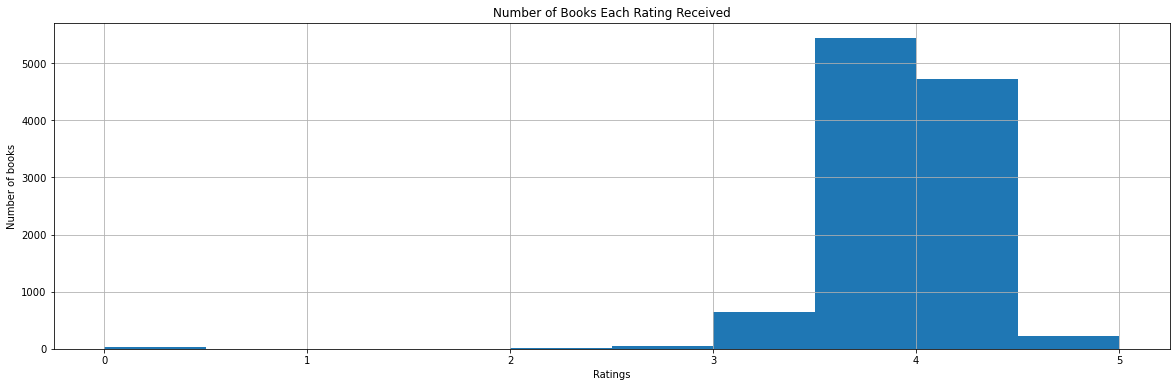

In [5]:
plt.figure(figsize=(20,6))
df.average_rating.hist()
plt.title("Number of Books Each Rating Received")
plt.xlabel("Ratings")
plt.ylabel("Number of books")
plt.show()

As confirmed earlier, about 50 percentile books have a rating close 4.0.

#### Average ratings per month

C:\Users\ndeob\anaconda3\envs\class_project\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(1.0, 5.0)

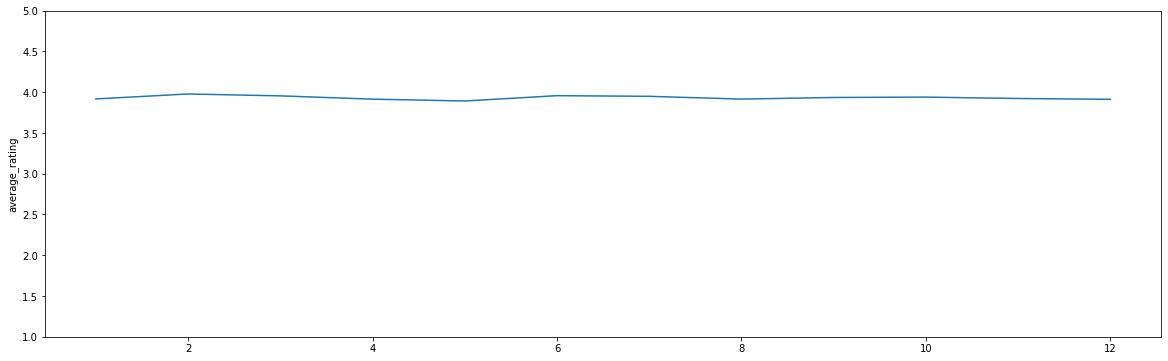

In [6]:
plt.figure(figsize=(20,6))
sns.lineplot(df['month'].value_counts().index, df.groupby('month')['average_rating'].mean())
plt.ylim(1,5)

Average rating per month hardly varies with months showing that month of publication has no influence on it.

#### Number of books for languages

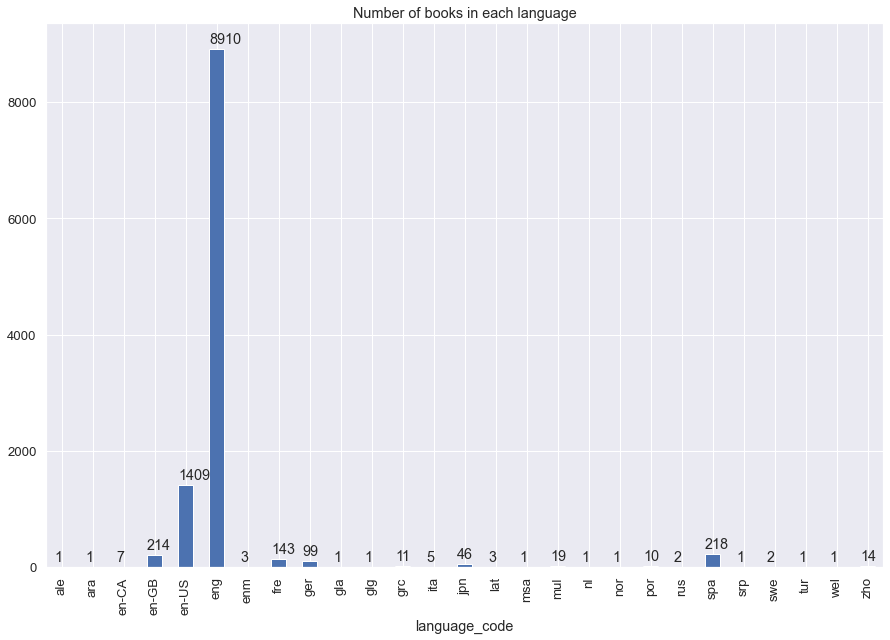

In [7]:
sns.set(font_scale=1.2)
plt.figure(figsize=(15,10))
ax = df.groupby('language_code')['title'].count().plot.bar()
plt.title('Number of books in each language')
for p in ax.patches: ax.annotate(str(p.get_height()), (p.get_x(), p.get_height()+100))

It is clear that almost all books are from English language. Also, the other peaks also belong to American and British English. The fourth language in which most books are published in the list is Spanish followed by French and German.

#### Highly rated authors

Last quartile for average ratings starts at 4.14. So, any author having number of books can be called prolific. Let's explore which authors have highest number of books with more than that 4.14 rating.

C:\Users\ndeob\anaconda3\envs\class_project\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


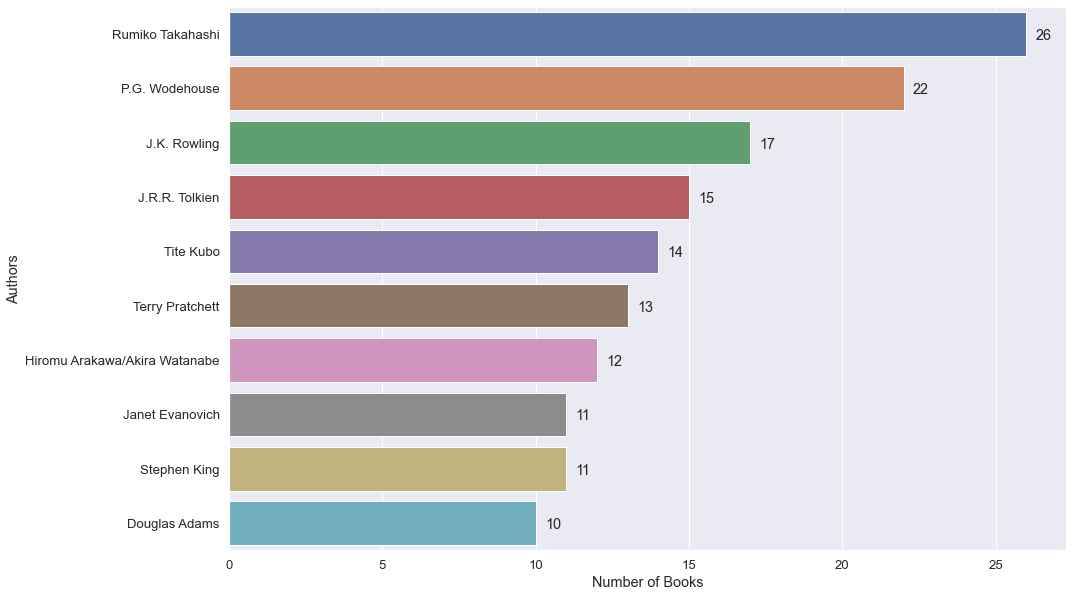

In [8]:
high_rated_author = df[df['average_rating']>=4.14]
high_rated_author = high_rated_author.groupby('authors')['title'].count().reset_index().sort_values('title', ascending = False).head(10).set_index('authors')
plt.figure(figsize=(15,10))
ax = sns.barplot(high_rated_author['title'], high_rated_author.index)
ax.set_xlabel("Number of Books")
ax.set_ylabel("Authors")
for i in ax.patches:
    ax.text(i.get_width()+.3, i.get_y()+0.5, str(round(i.get_width())))

It is clear that Rumiko Takahashi is the highest rated author since he or she has 26 books with average ratings in the last quartile.

### 2. Ratings count

#### Top 10 books with highest number of rating counts

C:\Users\ndeob\anaconda3\envs\class_project\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ratings_count', ylabel='title'>

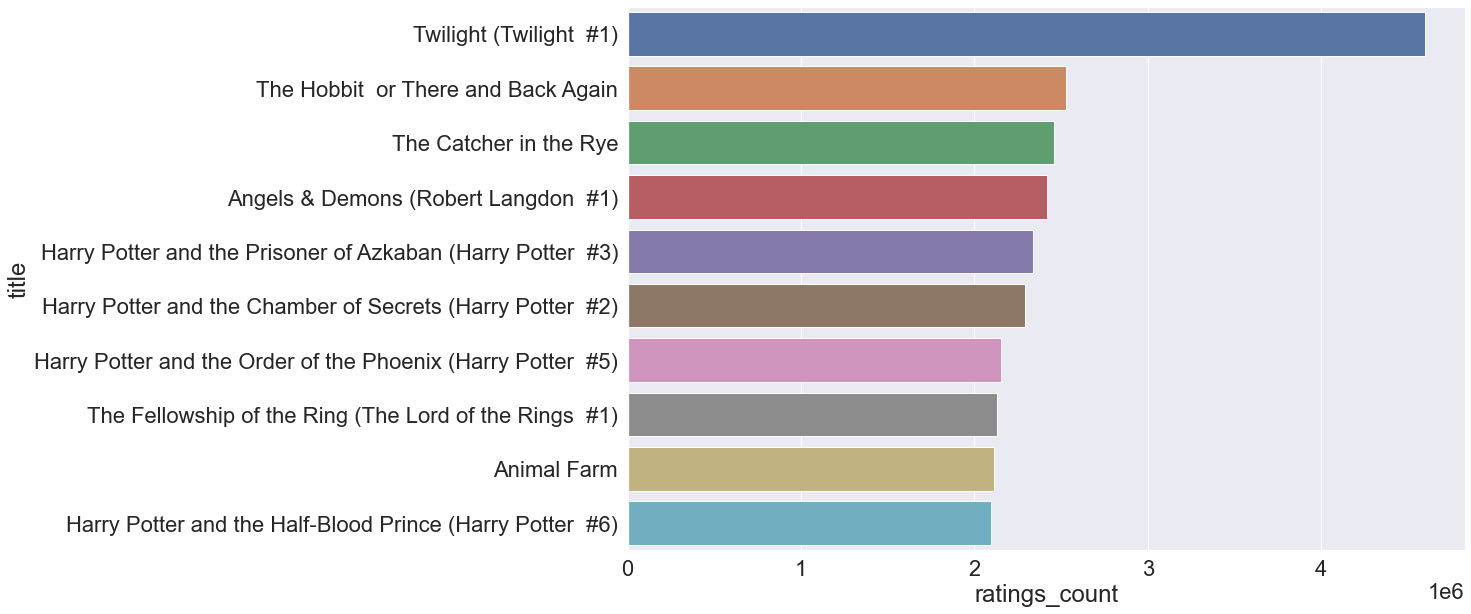

In [9]:
sns.set(font_scale=2)
most_rated = df.sort_values('ratings_count', ascending = False).head(10).set_index('title')
plt.figure(figsize=(15,10))
sns.barplot(most_rated['ratings_count'], most_rated.index)

It is clear that from the given data, the book Twilight has the highest number of ratings whereas rest of the 9 books have almost half of that.

#### Top 10 books with highest text review counts

C:\Users\ndeob\anaconda3\envs\class_project\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='text_reviews_count', ylabel='title'>

<Figure size 1440x720 with 0 Axes>

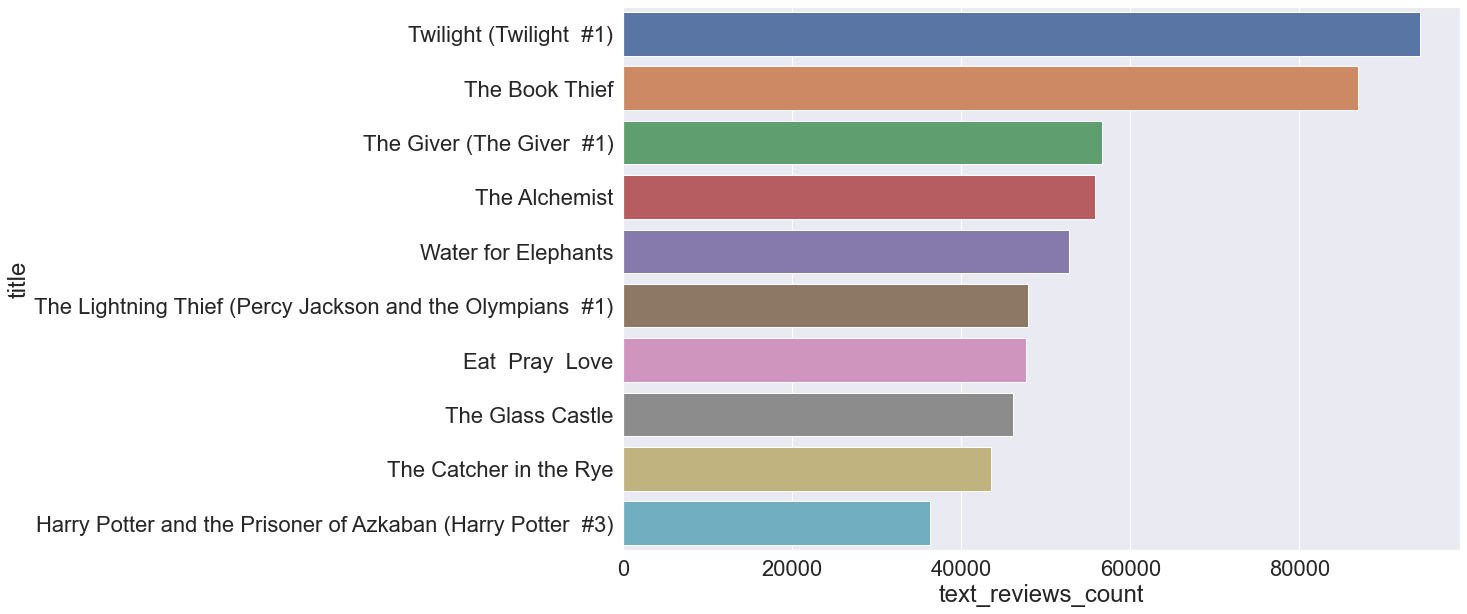

In [10]:
plt.figure(figsize=(20,10))
sns.set(font_scale=2)
most_rated = df.sort_values('text_reviews_count', ascending = False).head(10).set_index('title')
plt.figure(figsize=(15,10))
sns.barplot(most_rated['text_reviews_count'], most_rated.index)

Although text review counts for the book Twilight are also highest, rest of the top books are not mentioned in the previous list. 

### 3. Authors

#### Top 10 authors

C:\Users\ndeob\anaconda3\envs\class_project\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


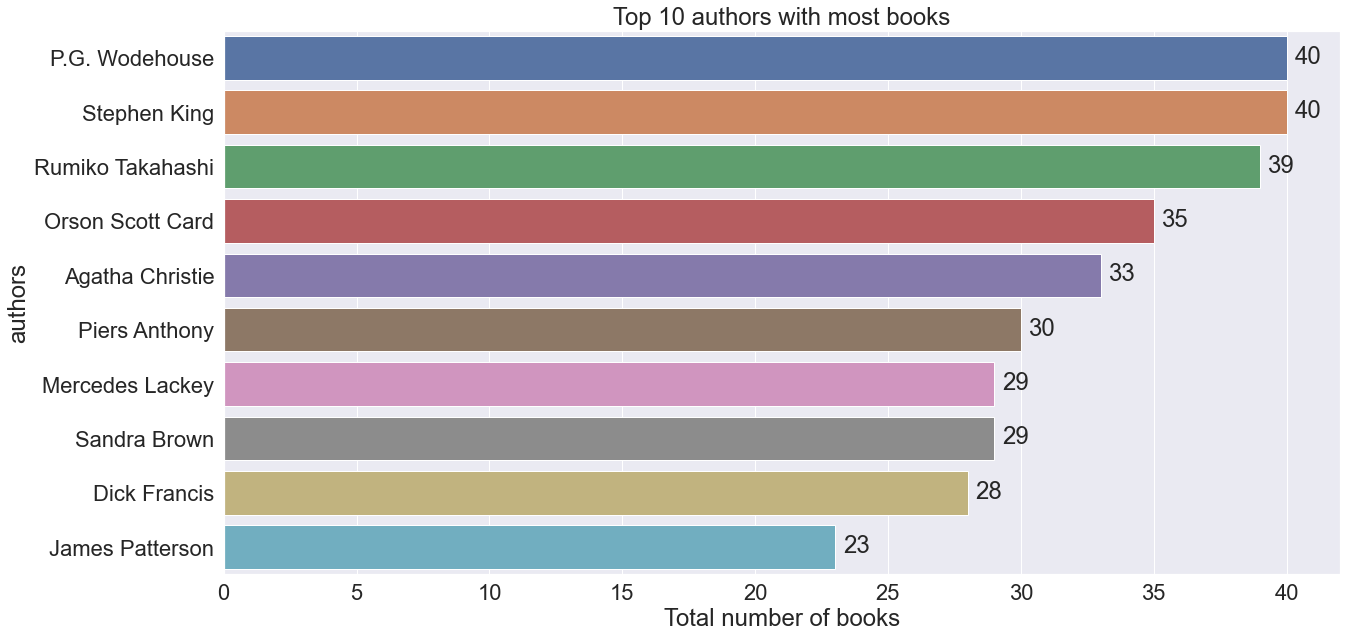

In [11]:
most_books = df.groupby('authors')['title'].count().reset_index().sort_values('title', ascending=False).head(10).set_index('authors')
plt.figure(figsize=(20,10))
ax = sns.barplot(most_books['title'], most_books.index)
ax.set_title("Top 10 authors with most books")
ax.set_xlabel("Total number of books")
for i in ax.patches:
    ax.text(i.get_width()+.3, i.get_y()+0.5, str(round(i.get_width())))

P.G. Woodhouse and Stephen King has the greatest number of books in the list closely followed by Rumiko Takahashi. 

## c. Study Corelation among variables

Just to have an idea if there is possibly any corelation between in the given dataframe, we may try to plot all variables that are available in integers as shown.

In [12]:
df.corr(method='pearson')

,average_rating,isbn13,num_pages,ratings_count,text_reviews_count,month,date,year,Age_of_book
average_rating,1.000000,-0.002015,0.150763,0.038209,0.033740,0.023233,-0.000771,-0.028790,0.027343
isbn13,-0.002015,1.000000,-0.009836,0.005492,0.008150,-0.010103,0.005273,-0.000343,0.000872
num_pages,0.150763,-0.009836,1.000000,0.034387,0.037043,0.025479,0.021943,-0.018956,0.016957
ratings_count,0.038209,0.005492,0.034387,1.000000,0.865978,-0.015694,-0.001674,0.044554,-0.043576
text_reviews_count,0.033740,0.008150,0.037043,0.865978,1.000000,-0.024909,0.010930,0.066896,-0.065358
month,0.023233,-0.010103,0.025479,-0.015694,-0.024909,1.000000,0.040779,0.022746,-0.075619
date,-0.000771,0.005273,0.021943,-0.001674,0.010930,0.040779,1.000000,0.056704,-0.058682
year,-0.028790,-0.000343,-0.018956,0.044554,0.066896,0.022746,0.056704,1.000000,-0.998173
Age_of_book,0.027343,0.000872,0.016957,-0.043576,-0.065358,-0.075619,-0.058682,-0.998173,1.000000


As such it seems that there is hardly any mentionable corelation of any variable with the books ratings. So, it is important to study the individual relation. 

### Relation between number of pages and average ratings

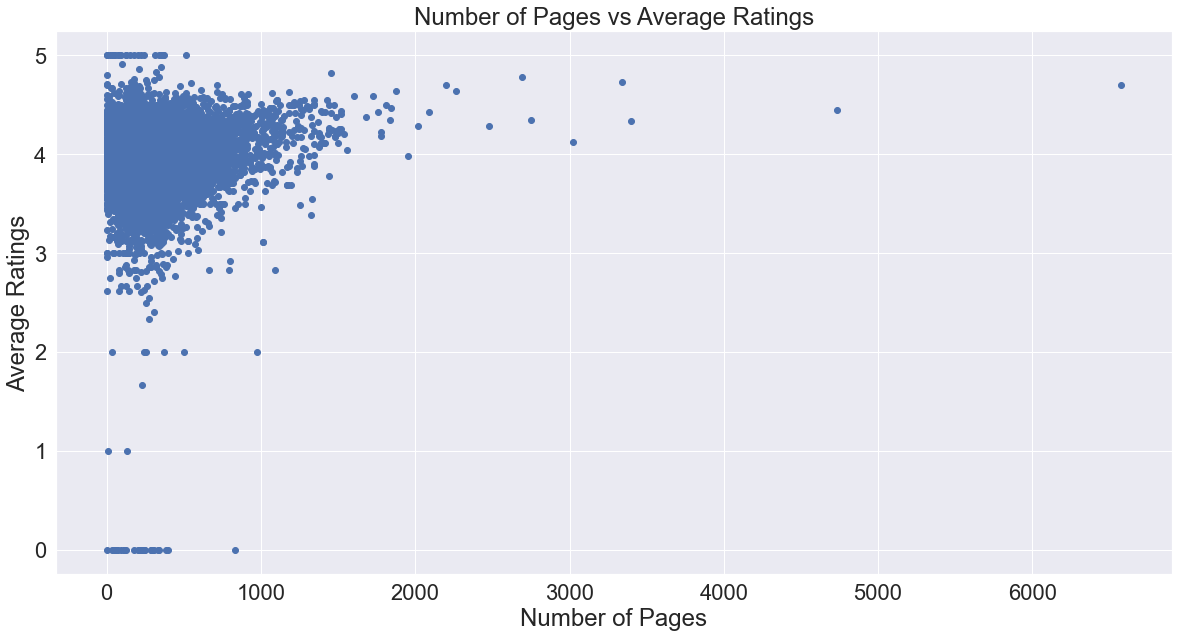

In [13]:
plt.figure(figsize=(20,10))
plt.scatter(df.num_pages,df.average_rating)
plt.title("Number of Pages vs Average Ratings")
plt.xlabel("Number of Pages")
plt.ylabel("Average Ratings")
plt.show()

From the chart above it is clear that there is hardly any corelation between the number of pages and ratings. However, is is interesting to see that above roughly 1600 pages, the book always has got really good ratings.

It could happen that such long books are read by only few people and very few people provided any feedback on such books.

#### Number of pages vs Ratings Count

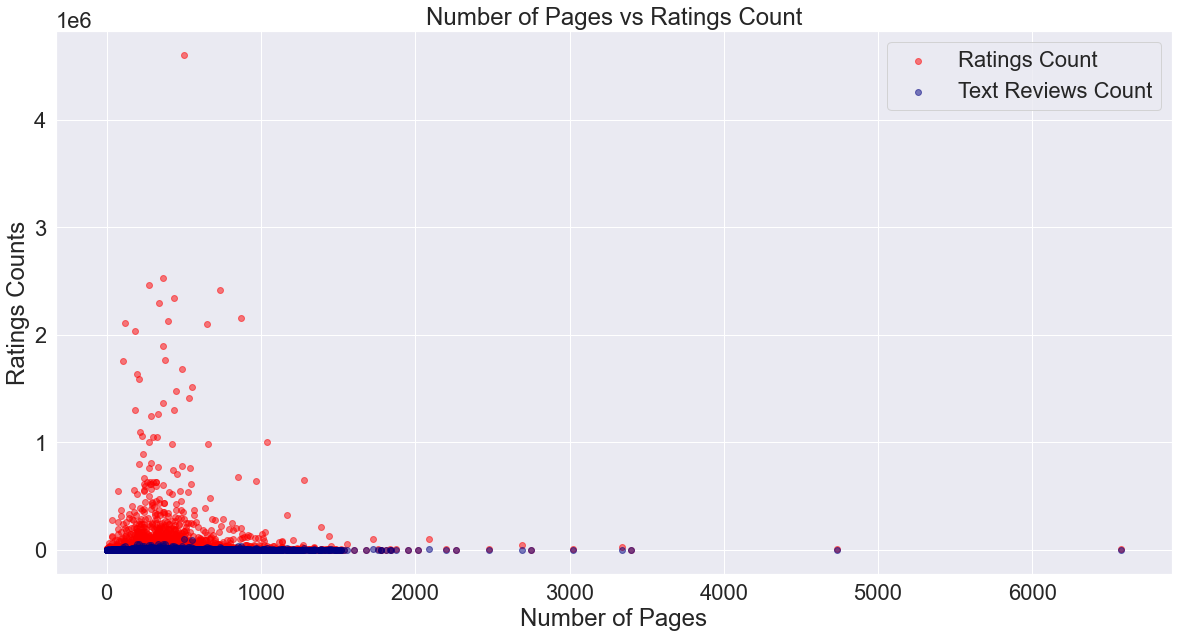

In [14]:
plt.figure(figsize=(20,10))
plt.scatter(df.num_pages,df.ratings_count, c = 'red', alpha = 0.5)
plt.scatter(df.num_pages,df.text_reviews_count, c = 'navy', alpha = 0.5)
plt.title("Number of Pages vs Ratings Count")
plt.xlabel("Number of Pages")
plt.ylabel("Ratings Counts")
plt.legend(["Ratings Count", "Text Reviews Count"])
plt.show()

As expected, it is clear that number of ratings, even in the form of texts is rare for books with pages more than 2000 from this graph. To explore more of these things lets chart the outliers for number of pages. 

##### Relations between Average ratings and Ratings count and Text Ratings count

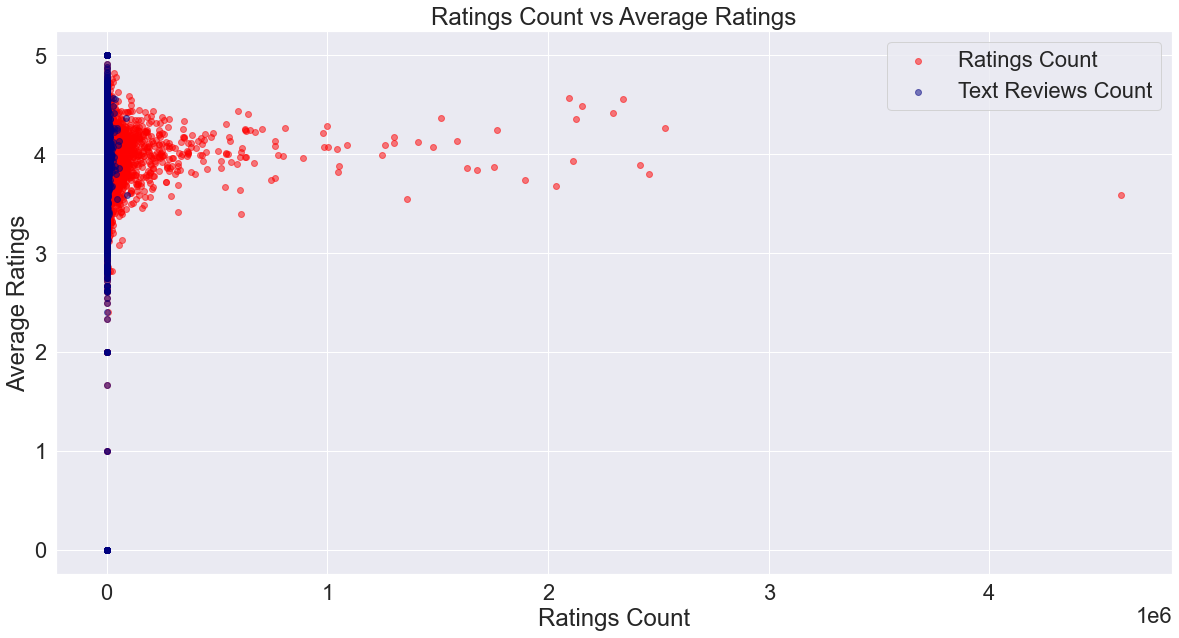

In [15]:
plt.figure(figsize=(20,10))
plt.scatter(df.ratings_count, df.average_rating, c = 'red', alpha = 0.5)
plt.scatter(df.text_reviews_count, df.average_rating, c = 'navy', alpha = 0.5)
plt.title("Ratings Count vs Average Ratings")
plt.xlabel("Ratings Count")
plt.ylabel("Average Ratings")
plt.legend(["Ratings Count", "Text Reviews Count"])
plt.show()

From the above chart, it is clear that as number of counts are increasing, we may see that trend seems a bit more clear. So, the books with lesser ratings counts have no clarity for the trend for average ratings.

### Outliers

Let's explore the outliers.

#### Outliers for average ratings in each month

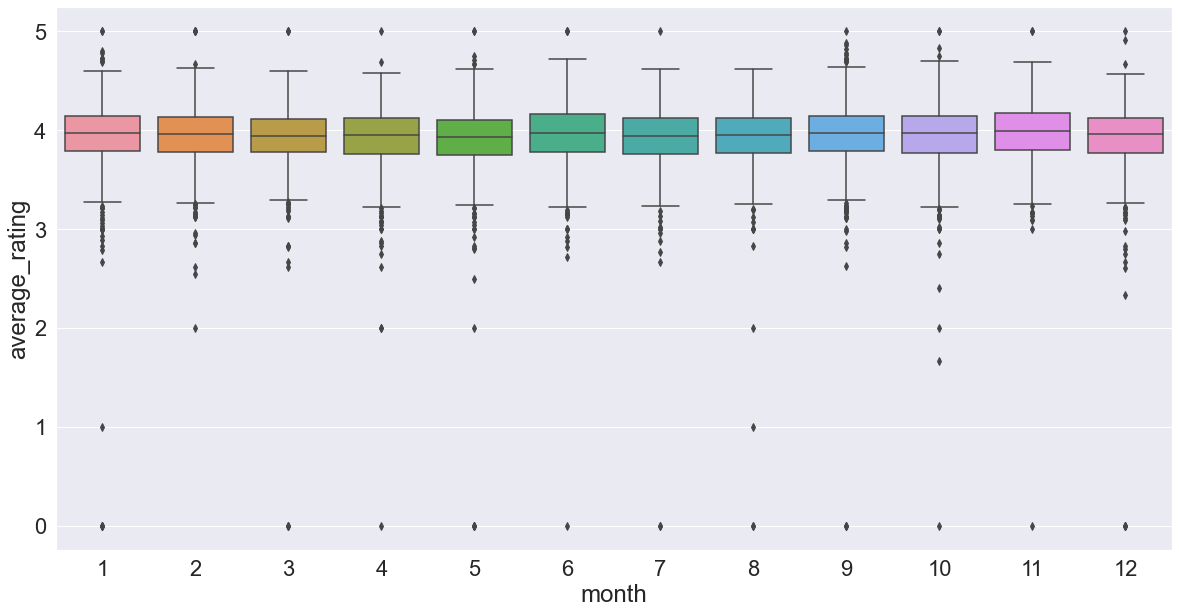

In [16]:
plt.figure(figsize=(20,10))
sns.boxplot(x=df.month,y=df.average_rating)
plt.show()

#### Ratings Count

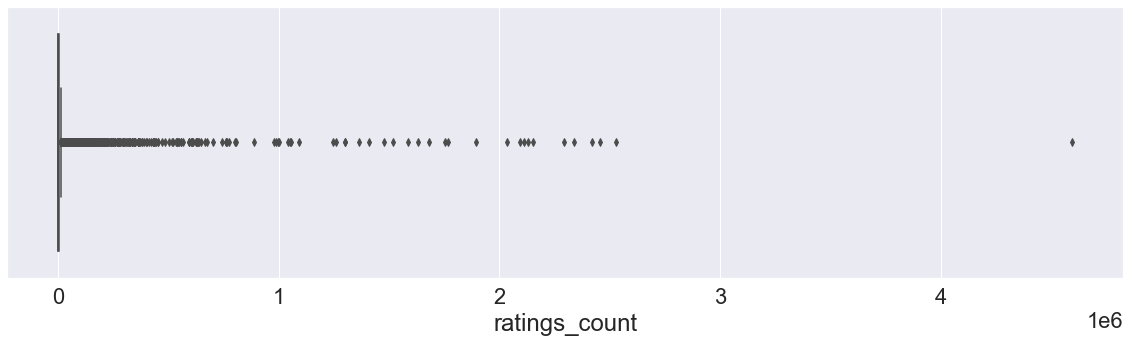

In [17]:
plt.figure(figsize=(20,5))
sns.boxplot(data = df, x= "ratings_count")
plt.show()

#### Text Review Count

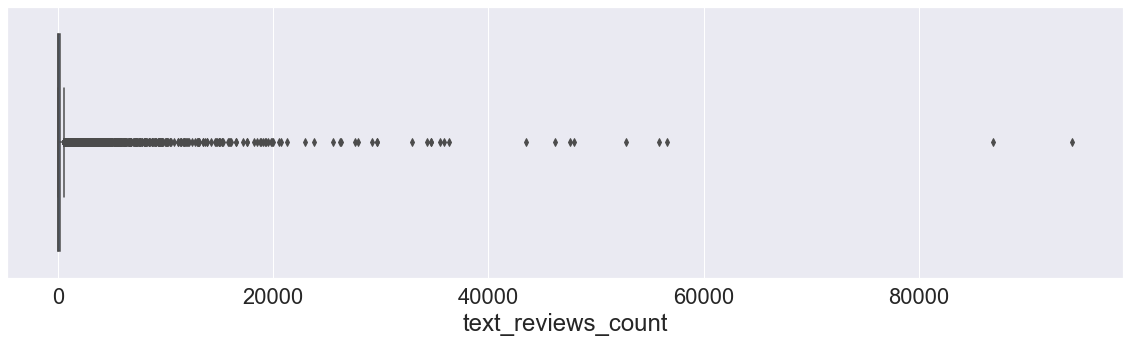

In [18]:
plt.figure(figsize=(20,5))
sns.boxplot(data = df, x = "text_reviews_count")
plt.show()